In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns

In [237]:
df = pd.read_csv(r'C:\Users\elosasso\OneDrive - Universidad Torcuato Di Tella\Machine Learning\TP\data\train.csv')

In [238]:
df.shape

(33008, 312)

In [239]:
df['TARGET'] = pd.Categorical(df['TARGET'])  # Convierto la variable target a categorica

In [240]:
len(imp_cols) + len(saldo_cols) + len(num_cols) + len(in_columns) + len(delta_columns)

307

In [241]:
[x for x in df.columns if x not in imp_cols+saldo_cols+num_cols+in_columns+delta_columns]

['ID', 'nac', 'age', 'var36', 'var21', 'var38', 'TARGET']

### Distribución de la variable target

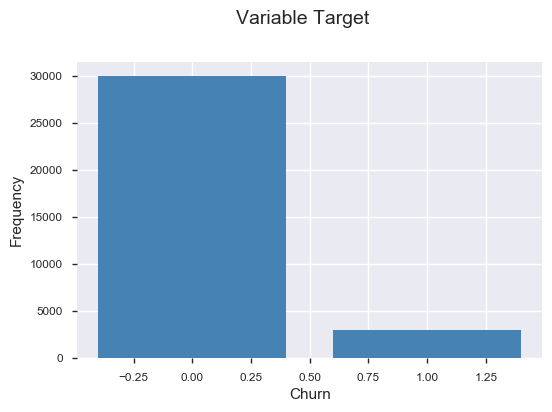

In [242]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Variable Target", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Churn")
ax.set_ylabel("Frequency") 
w_q = df['TARGET'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue')

### Proporción de churn/ no churn

In [243]:
(df['TARGET'].value_counts()/df.shape[0])*100

0    90.887058
1     9.112942
Name: TARGET, dtype: float64

### Distribución de la edad

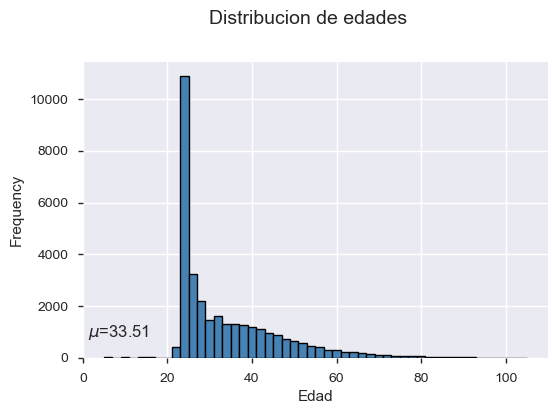

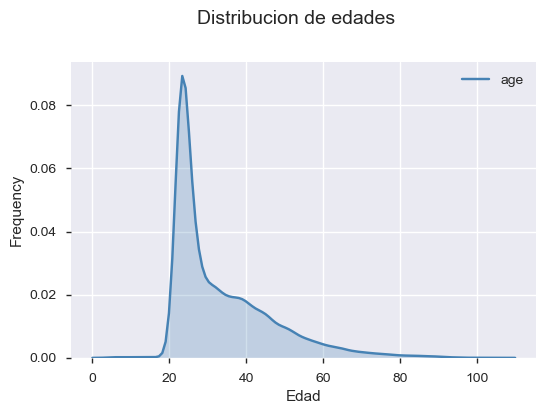

In [244]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Distribucion de edades", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Edad")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['age'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['age'], color='steelblue', bins=50,
                                    edgecolor='black', linewidth=1)
                                    

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Distribucion de edades", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Edad")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df['age'], ax=ax1, shade=True, color='steelblue')

### Distribucion de variables *'varx'*

Existen tres variables que desconocemos a qué hacen referencia o los valores que representan, por eso miramos la distribución de estas para entender un poco cómo se encuentra compuesta

Text(0.5, 55.8611111111111, 'var38')

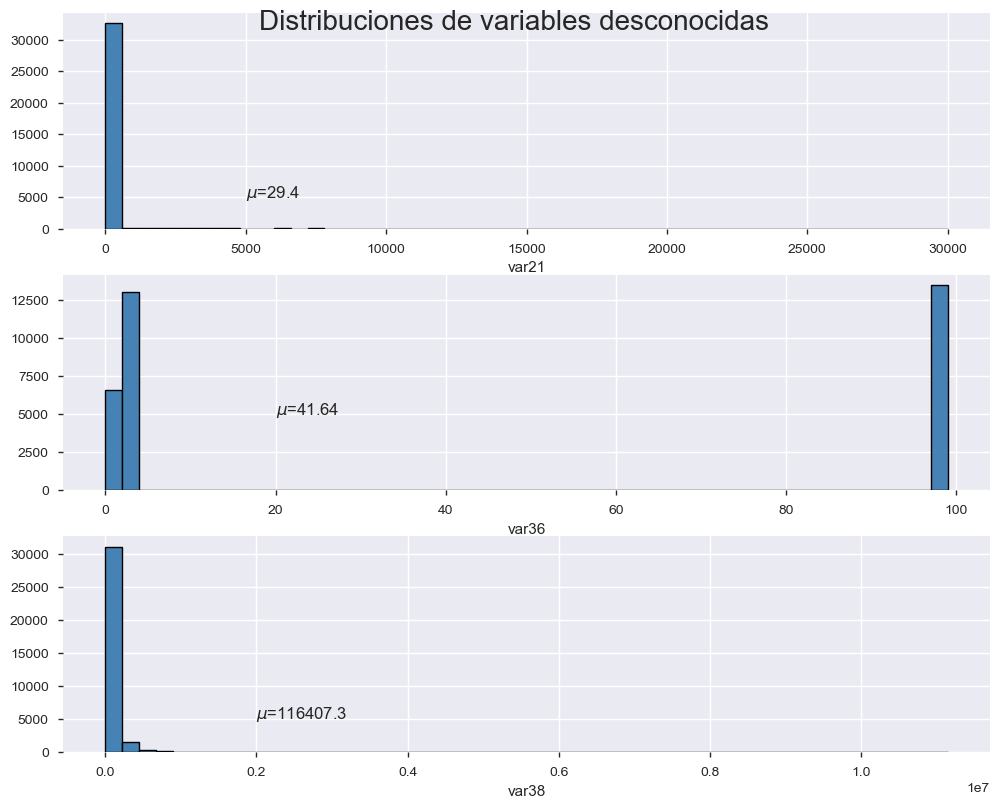

In [245]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10,8))
plt.tight_layout() 

# Setear titulo
plt.suptitle('Distribuciones de variables desconocidas', fontsize = 20)

# Var21
ax[0].hist(df['var21'], color = 'steelblue', bins = 50, edgecolor = 'black', linewidth = 1)   # Creo el histograma
ax[0].text(5000, 5000, r'$\mu$='+str(round(df['var21'].mean(),2)), 
         fontsize=12)                                                                         # Calculo e imprimo la media en el grafico
ax[0].set_xlabel('var21')                                                                     # Cambio el nombre del eje x para que se 
                                                                                              # de que variable se esta hablando

# Var 36
ax[1].hist(df['var36'], color = 'steelblue', bins = 50, edgecolor = 'black', linewidth = 1)
ax[1].text(20, 5000, r'$\mu$='+str(round(df['var36'].mean(),2)), 
         fontsize=12)
ax[1].set_xlabel('var36')

# Var 38
ax[2].hist(df['var38'], color = 'steelblue', bins = 50, edgecolor = 'black', linewidth = 1)
ax[2].text(2000000, 5000, r'$\mu$='+str(round(df['var38'].mean(),2)), 
         fontsize=12)
ax[2].set_xlabel('var38')

Es muy dificil tratar de graficar la distribución para todas las variables, por eso se separan según aparecen clasificadas en el archivo 'levantadatos.R':
* *'imp'* y *'saldo'* como variables continuas
* *'num'* como variable continua
* *'in'* como variable categorica
* *'delta'* como variable con variacion en el tiempo


In [256]:
imp_cols   = [x for x in df.columns if 'imp_' in x and 'delta_' not in x]      # Guardo las columnas que tienen el prefijo 'imp'
saldo_cols = [x for x in df.columns if 'saldo' in x and 'delta_' not in x]     # Guardo las columnas que tienen el prefijo 'saldo'
num_cols   = [x for x in df.columns if 'num' in x and 'delta_' not in x]       # Guardo las columnas que tienen el prefijo 'num'
in_columns = [x for x in df.columns if 'in' in x and ('delta_' not in x and 'num' not in x and 'imp' not in x)]       # Guardo las columnas que tienen el prefijo 'num'
delta_columns = [x for x in df.columns if 'delta' in x ]

In [247]:
print(len(imp_cols))
print(len(saldo_cols))
print(len(num_cols))
print(len(in_columns))
print(len(delta_columns))

37
62
122
66
20


## Distribución de las variables de tipo *'importe (imp)'*

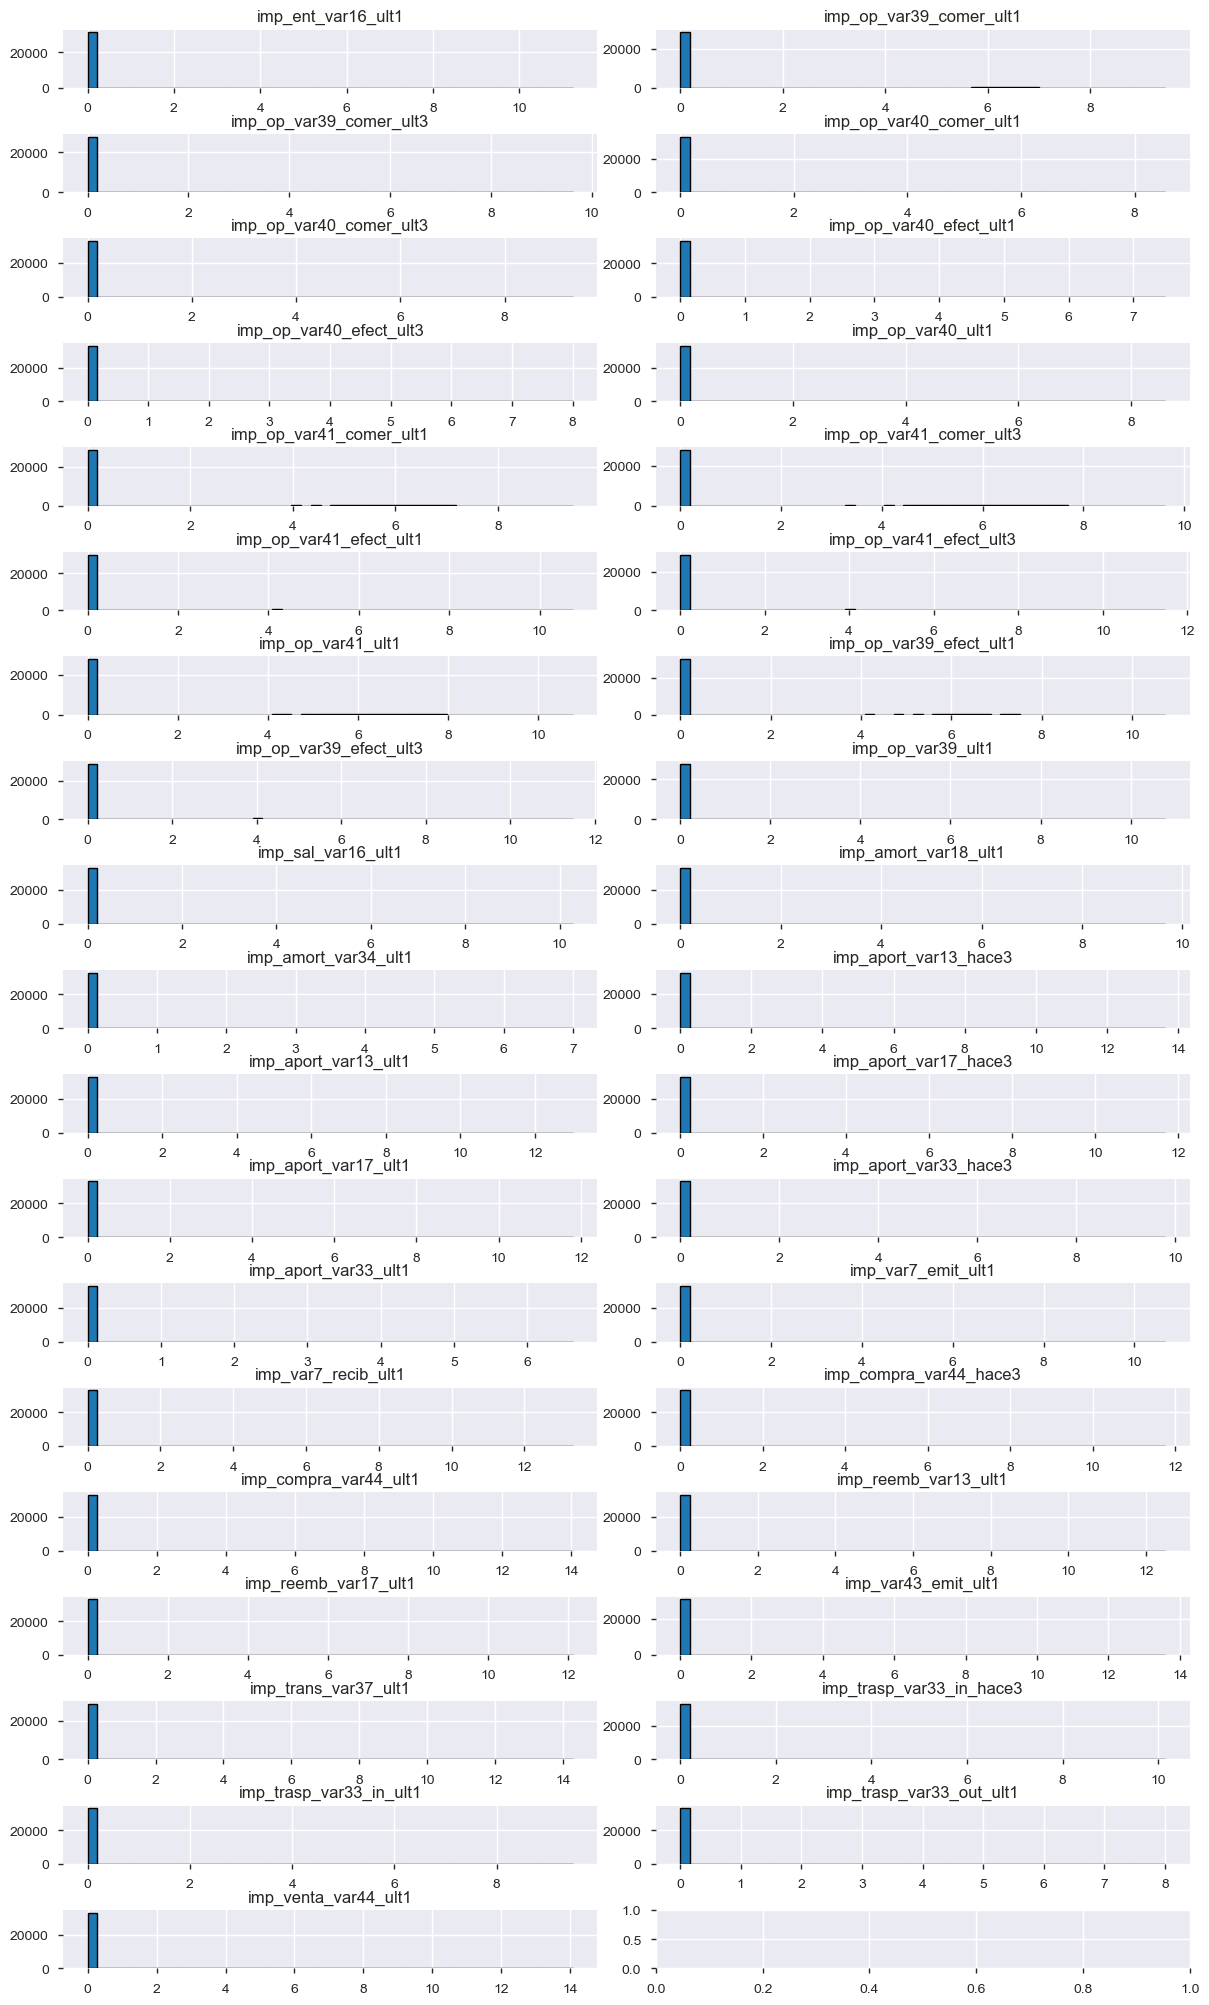

In [248]:
axes_index = [[x,y] for x,y in itertools.product(range(19), range(2))]                              # Creo un vector para guardar las posiciones en la matriz de ejes mas abajo
fig, axes = plt.subplots(nrows=19, ncols=2, figsize = (12,20))                                      # Creo un subplot con la cantidad de variables de tipo imp
plt.tight_layout()                                                                                  # Para que se encuentren distribuidos de forma pareja
for i in range(0,len(imp_cols)):
    axes[axes_index[i][0],axes_index[i][1]].hist(np.log(df[imp_cols[i]] + 1 - min(df[imp_cols[i]])), 
                                                 bins = 50, edgecolor = 'black', 
                                                 linewidth = 1.0)
    axes[axes_index[i][0],axes_index[i][1]].set_title(imp_cols[i])

## Distribución de las variables de tipo *'saldo (saldo)'*

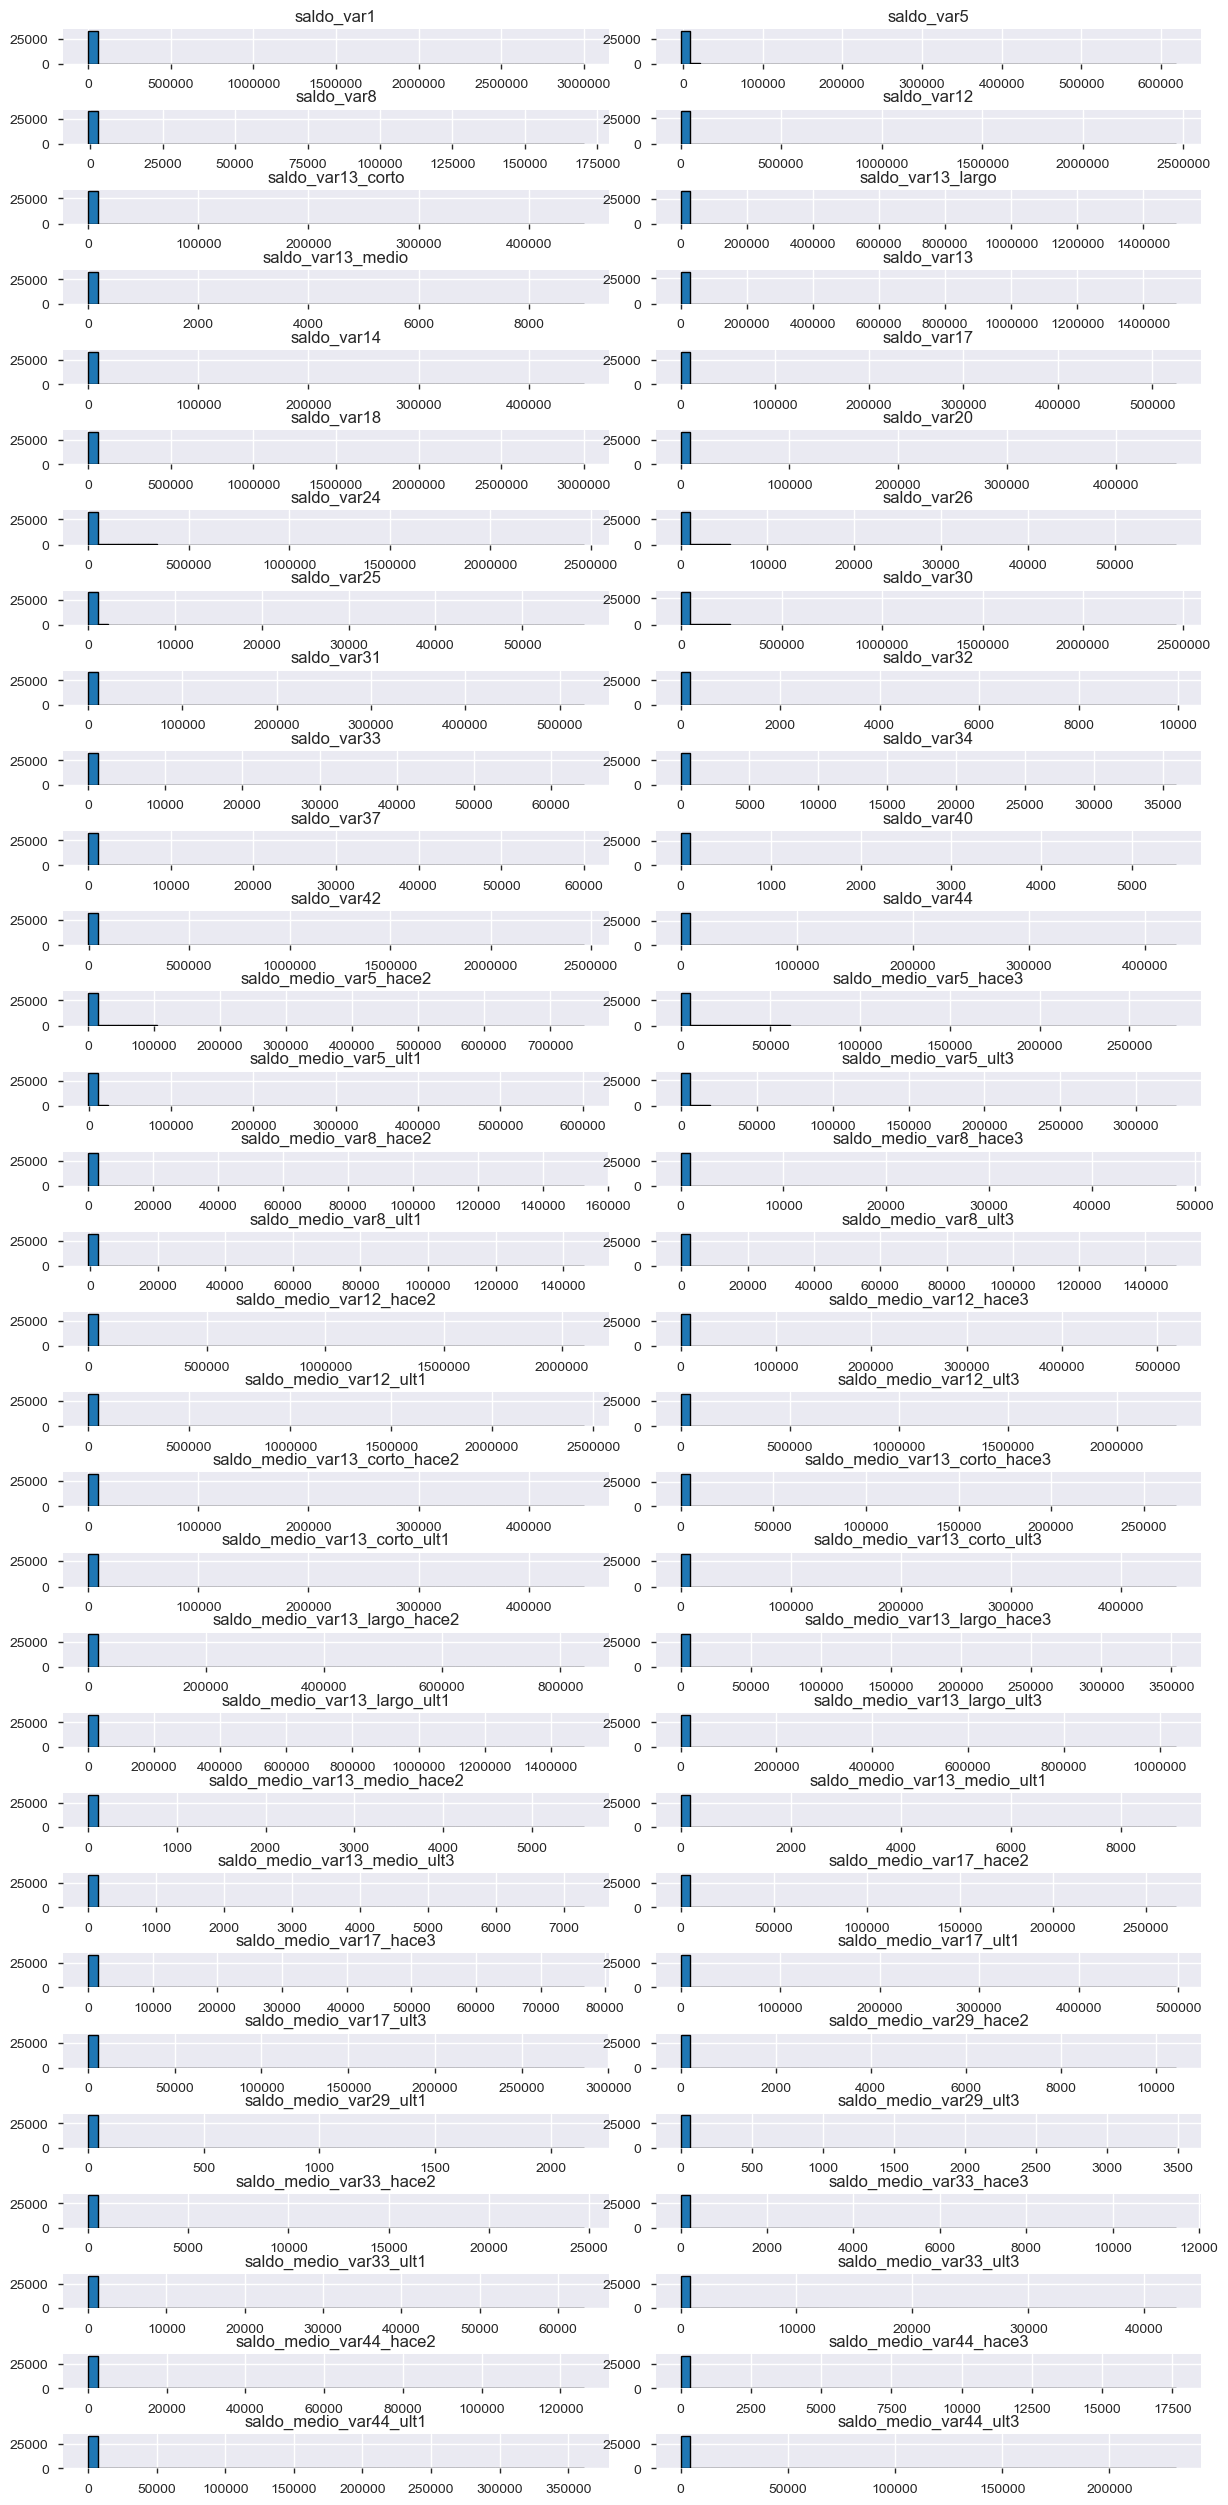

In [249]:
axes_index = [[x,y] for x,y in itertools.product(range(31), range(2))]                              # Creo un vector para guardar las posiciones en la matriz de ejes mas abajo
fig, axes = plt.subplots(nrows=31, ncols=2, figsize = (12,25))                                      # Creo un subplot con la cantidad de variables de tipo imp
plt.tight_layout()                                                                                  # Para que se encuentren distribuidos de forma pareja
for i in range(0,len(saldo_cols)):
    axes[axes_index[i][0],axes_index[i][1]].hist(df[saldo_cols[i]], 
                                                 bins = 50, edgecolor = 'black', 
                                                 linewidth = 1.0)
    axes[axes_index[i][0],axes_index[i][1]].set_title(saldo_cols[i])

## Distribución de las variables de tipo *'ind'*

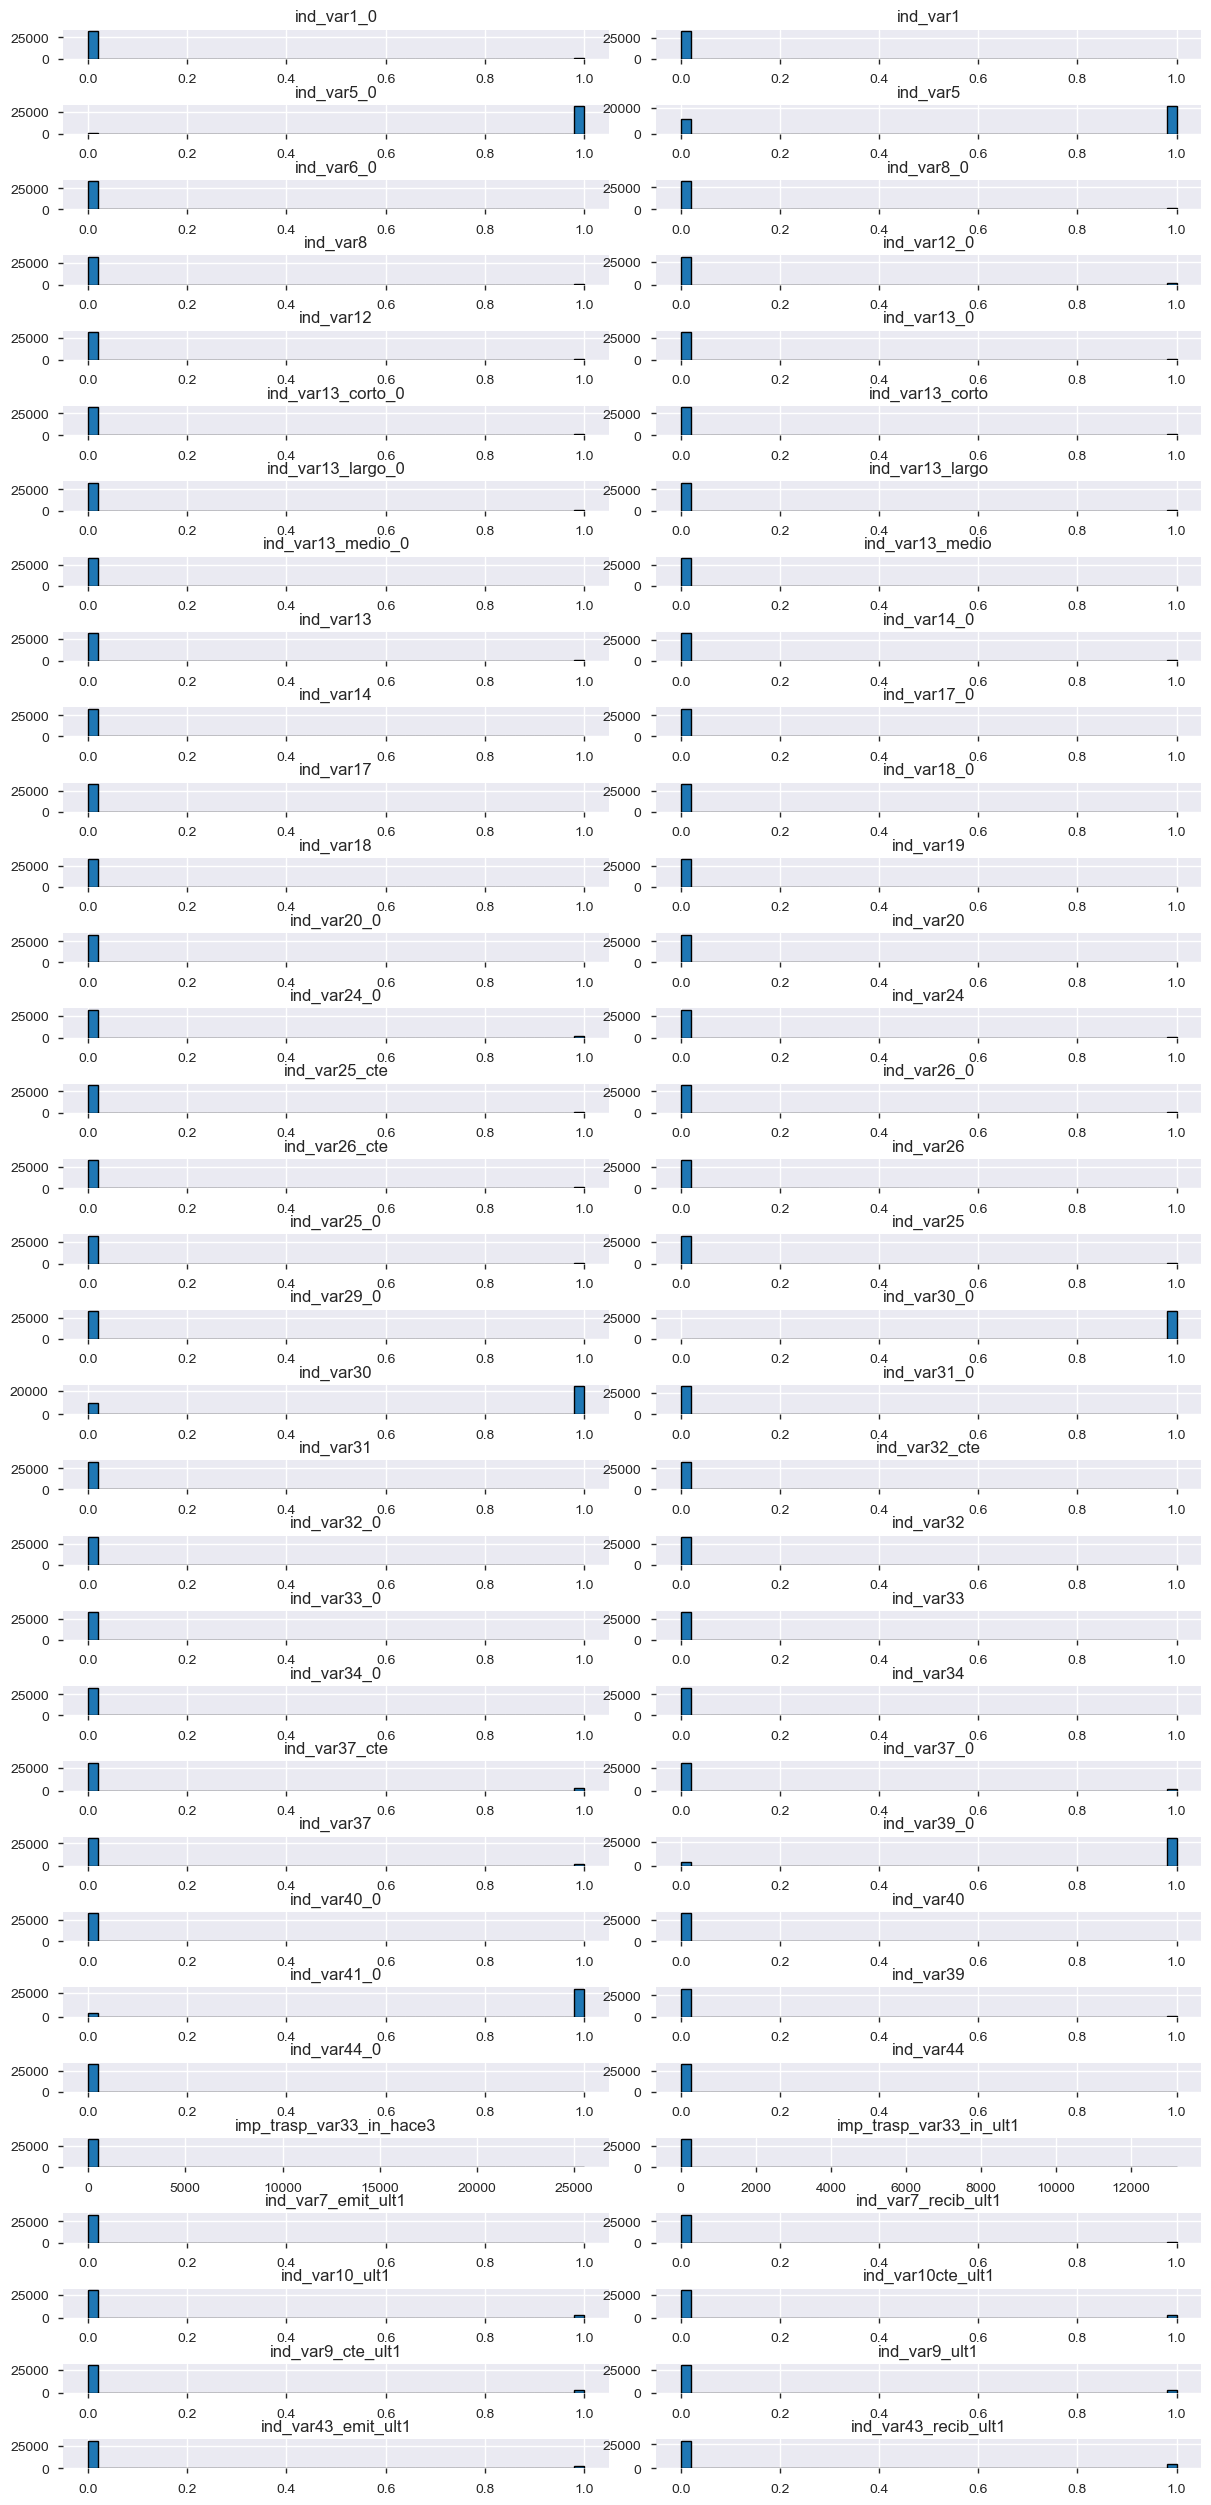

In [250]:
axes_index = [[x,y] for x,y in itertools.product(range(33), range(2))]                              # Creo un vector para guardar las posiciones en la matriz de ejes mas abajo
fig, axes = plt.subplots(nrows=33, ncols=2, figsize = (12,25))                                      # Creo un subplot con la cantidad de variables de tipo imp
plt.tight_layout()                                                                                  # Para que se encuentren distribuidos de forma pareja
for i in range(0,len(in_columns)):
    axes[axes_index[i][0],axes_index[i][1]].hist(df[in_columns[i]], 
                                                 bins = 50, edgecolor = 'black', 
                                                 linewidth = 1.0)
    axes[axes_index[i][0],axes_index[i][1]].set_title(in_columns[i])

Evidentemente se trata de variables categóricas o booleanas (1/0) por lo que hay que castearlas a la clase adecuada

In [259]:
# Convierto las columnas 'ind_x' en tipo categoricas

for col in in_columns:
    df[col] = pd.Categorical(df[col])

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33008 entries, 0 to 33007
Columns: 312 entries, ID to TARGET
dtypes: category(65), float64(97), int64(150)
memory usage: 64.3 MB
